In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib

In [2]:
# Load Datasets
df_train=pd.read_csv("B:/Data Science Course/Data Science/Assignments/Logistic Regression/Titanic_train.csv")
df_test=pd.read_csv("B:/Data Science Course/Data Science/Assignments/Logistic Regression/Titanic_test.csv")

In [3]:
df_train["code"]=1
df_test["code"]=2
df = pd.concat([df_train, df_test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
print(df.shape)

(1309, 13)


In [5]:
print(df["code"].value_counts())

code
1    891
2    418
Name: count, dtype: int64


In [6]:
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
code              0
dtype: int64


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  code         1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.8811

In [8]:
#removing the null values
surv_mo=df['Survived'].mode()
age_mea=df["Age"].mean()
fare_mea=df['Fare'].mean()
emb_mo=df["Embarked"].mode()
df["Survived"].fillna(0,inplace=True)
df["Age"].fillna(age_mea,inplace=True)
df["Fare"].fillna(fare_mea,inplace=True)
df["Embarked"].fillna("S",inplace=True)

In [9]:
print(surv_mo)
print(emb_mo)

0    0.0
Name: Survived, dtype: float64
0    S
Name: Embarked, dtype: object


In [10]:
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
code              0
dtype: int64


In [11]:
#drop the column of cabin and passenger Id
df.drop(["Cabin"],axis=1,inplace=True)
df.drop(["PassengerId"],axis=1,inplace=True)

In [12]:
print(df.shape)

(1309, 11)


In [13]:
#finding the dupicates in the data
df.duplicated().sum()

0

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


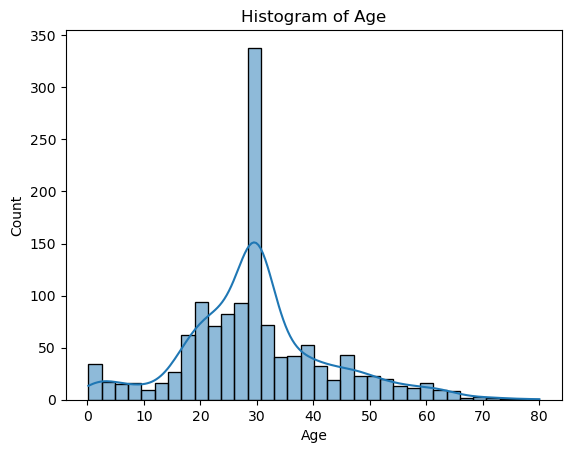

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


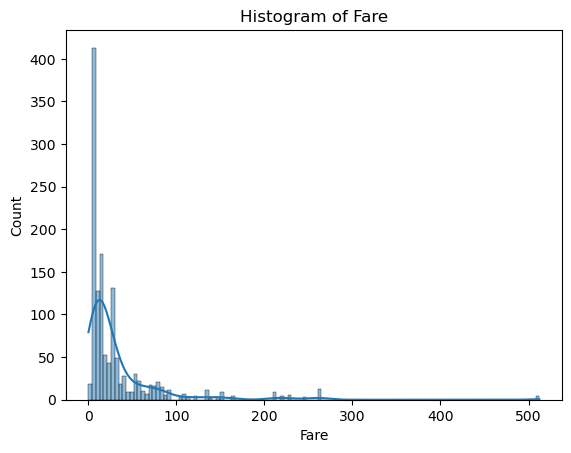

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


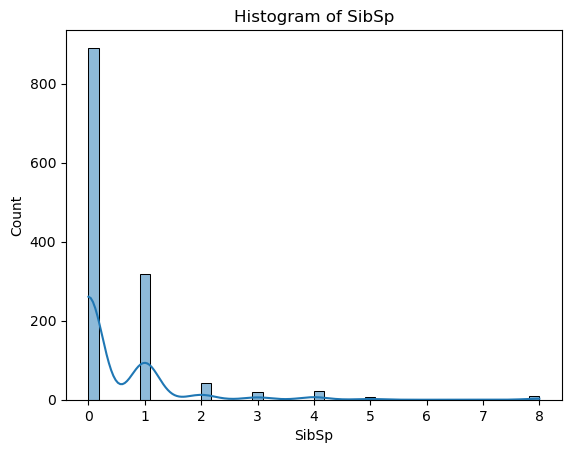

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


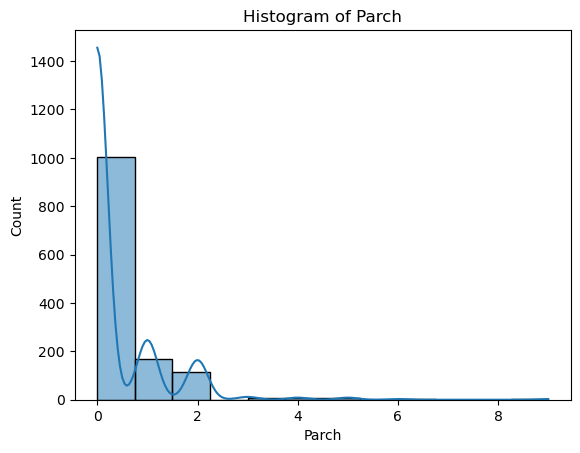

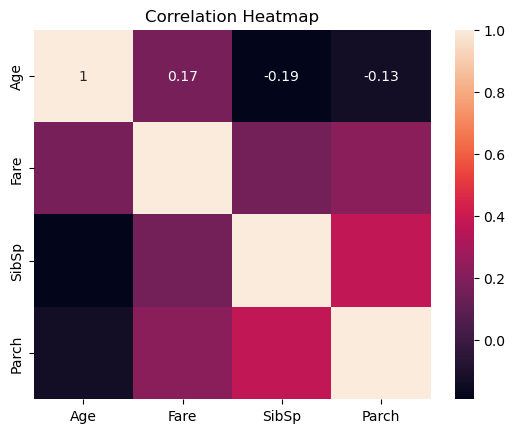

In [14]:
# Histrogram and Heatmap;
numerical_columns=["Age","Fare","SibSp","Parch"]
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()
sns.heatmap(df[numerical_columns].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0.0,1.0
Sex,,
female,233,233
male,734,109


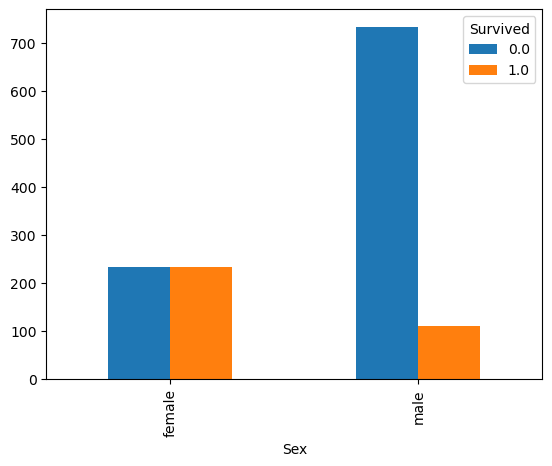

In [16]:
pd.crosstab(df["Sex"],df["Survived"]).plot(kind="bar")
plt.show()

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


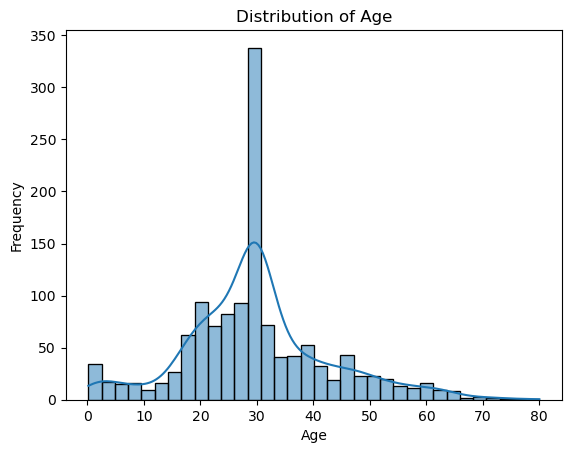

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


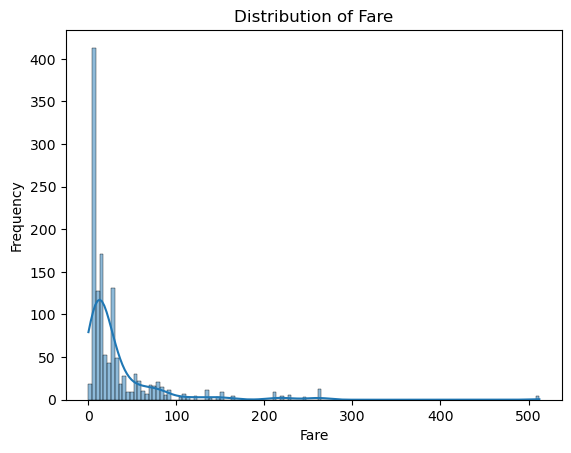

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


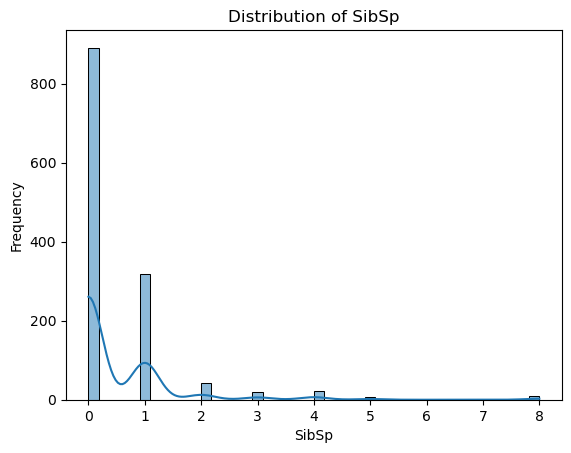

b:\Data Science Course\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


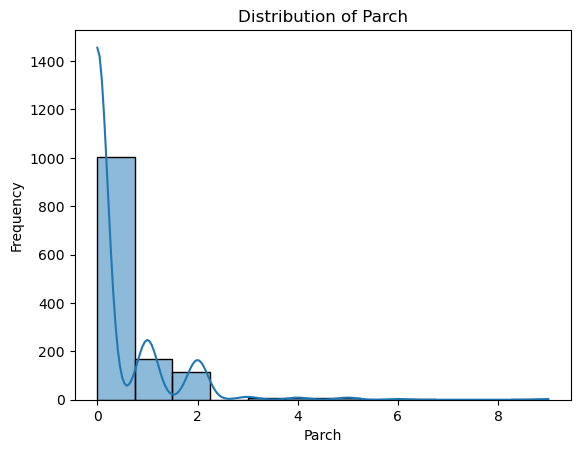

In [17]:
for i in numerical_columns:
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()


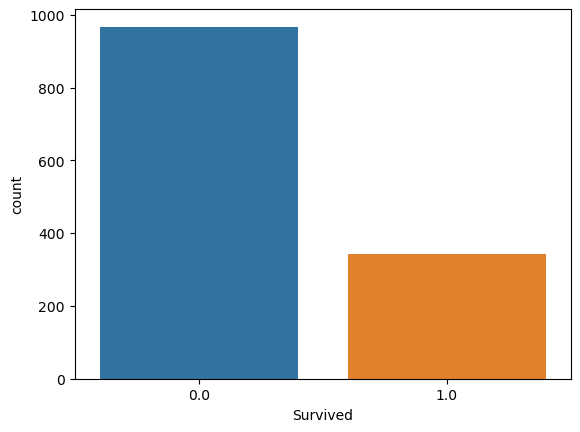

In [18]:
sns.countplot(x="Survived",data=df)
plt.show()

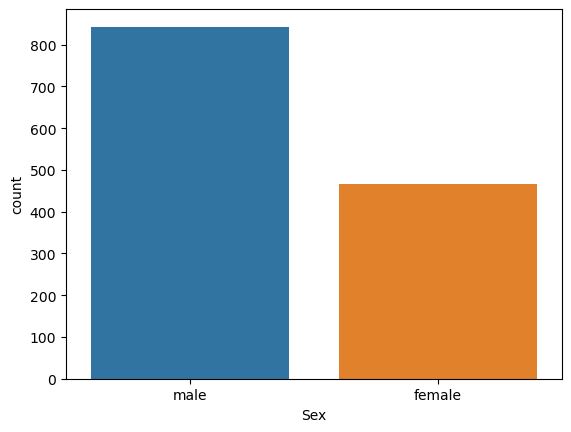

In [19]:
sns.countplot(x="Sex",data=df)
plt.show()

In [20]:
gender = pd.get_dummies(df["Sex"],drop_first=True)
df['Gender'] = gender


In [21]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,code,Gender
0,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,True
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,False
2,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,False
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,False
4,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,2,True
414,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,2,False
415,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,2,True
416,0.0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,2,True


In [22]:
#drop non-usefull columns
df.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)

In [23]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender
0,0.0,3,22.000000,1,0,7.2500,1,True
1,1.0,1,38.000000,1,0,71.2833,1,False
2,1.0,3,26.000000,0,0,7.9250,1,False
3,1.0,1,35.000000,1,0,53.1000,1,False
4,0.0,3,35.000000,0,0,8.0500,1,True
...,...,...,...,...,...,...,...,...
413,0.0,3,29.881138,0,0,8.0500,2,True
414,0.0,1,39.000000,0,0,108.9000,2,False
415,0.0,3,38.500000,0,0,7.2500,2,True
416,0.0,3,29.881138,0,0,8.0500,2,True


In [24]:
df_new_train=df[df["code"]==1]
df_new_test=df[df["code"]==2]

In [25]:
print(df_new_train.shape)
print(df_new_test.shape)

(891, 8)
(418, 8)


In [26]:
x_train=df_new_train.drop(["Survived","code"],axis=1)
y_train=df_new_train["Survived"]
x_test=df_new_test.drop(["Survived","code"],axis=1)
y_test=df_new_test["Survived"]

In [27]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,22.000000,1,0,7.2500,True
1,1,38.000000,1,0,71.2833,False
2,3,26.000000,0,0,7.9250,False
3,1,35.000000,1,0,53.1000,False
4,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True
887,1,19.000000,0,0,30.0000,False
888,3,29.881138,1,2,23.4500,False
889,1,26.000000,0,0,30.0000,True


In [28]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [29]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Gender
0,3,34.500000,0,0,7.8292,True
1,3,47.000000,1,0,7.0000,False
2,2,62.000000,0,0,9.6875,True
3,3,27.000000,0,0,8.6625,True
4,3,22.000000,1,1,12.2875,False
...,...,...,...,...,...,...
413,3,29.881138,0,0,8.0500,True
414,1,39.000000,0,0,108.9000,False
415,3,38.500000,0,0,7.2500,True
416,3,29.881138,0,0,8.0500,True


In [30]:
y_test

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
413    0.0
414    0.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 418, dtype: float64

In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [32]:
model.score(x_train,y_train)

0.8013468013468014

In [33]:
y_pred_train=model.predict(x_train)

In [34]:
df_new_train["y_pred_train"]=y_pred_train
df_new_train

C:\Users\vaibh\AppData\Local\Temp\ipykernel_17336\3680330310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train["y_pred_train"]=y_pred_train


,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,y_pred_train
0,0.0,3,22.000000,1,0,7.2500,1,True,0.0
1,1.0,1,38.000000,1,0,71.2833,1,False,1.0
2,1.0,3,26.000000,0,0,7.9250,1,False,1.0
3,1.0,1,35.000000,1,0,53.1000,1,False,1.0
4,0.0,3,35.000000,0,0,8.0500,1,True,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.000000,0,0,13.0000,1,True,0.0
887,1.0,1,19.000000,0,0,30.0000,1,False,1.0
888,0.0,3,29.881138,1,2,23.4500,1,False,0.0
889,1.0,1,26.000000,0,0,30.0000,1,True,1.0


In [35]:
y_pred_train

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_pred_test=model.predict(x_test)

In [37]:
df_new_test["y_pred_test"]=y_pred_test
df_new_test

C:\Users\vaibh\AppData\Local\Temp\ipykernel_17336\968637914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["y_pred_test"]=y_pred_test


,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,y_pred_test
0,0.0,3,34.500000,0,0,7.8292,2,True,0.0
1,0.0,3,47.000000,1,0,7.0000,2,False,0.0
2,0.0,2,62.000000,0,0,9.6875,2,True,0.0
3,0.0,3,27.000000,0,0,8.6625,2,True,0.0
4,0.0,3,22.000000,1,1,12.2875,2,False,1.0
...,...,...,...,...,...,...,...,...,...
413,0.0,3,29.881138,0,0,8.0500,2,True,0.0
414,0.0,1,39.000000,0,0,108.9000,2,False,1.0
415,0.0,3,38.500000,0,0,7.2500,2,True,0.0
416,0.0,3,29.881138,0,0,8.0500,2,True,0.0


In [38]:
print(y_pred_test)

[0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.

In [39]:
accuracy_score(y_train,y_pred_train)

0.8013468013468014

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       549
         1.0       0.76      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred_train))

[[472  77]
 [100 242]]


In [42]:
from sklearn.metrics import roc_curve,roc_auc_score
df_new_train["Y_proba"] = model.predict_proba(x_train)[:,1]
df_new_train.head()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_17336\2083738588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train["Y_proba"] = model.predict_proba(x_train)[:,1]


,Survived,Pclass,Age,SibSp,Parch,Fare,code,Gender,y_pred_train,Y_proba
0,0.0,3,22.0,1,0,7.2500,1,True,0.0,0.100320
1,1.0,1,38.0,1,0,71.2833,1,False,1.0,0.893457
2,1.0,3,26.0,0,0,7.9250,1,False,1.0,0.655687
3,1.0,1,35.0,1,0,53.1000,1,False,1.0,0.899178
4,0.0,3,35.0,0,0,8.0500,1,True,0.0,0.086501


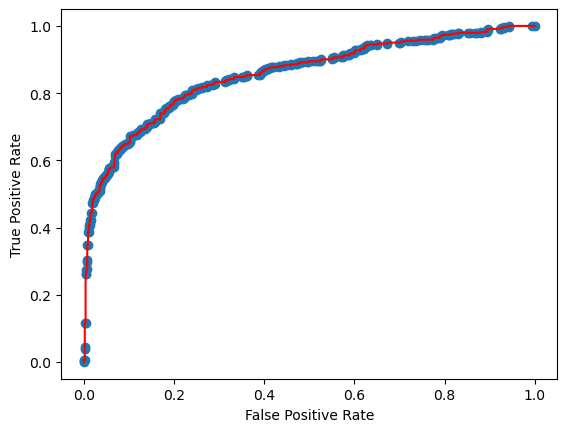

0.8563549888686501


In [43]:
fpr,tpr,thresholds = roc_curve(df_new_train["Survived"],df_new_train["Y_proba"])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print(roc_auc_score(df_new_train["Survived"],df_new_train["Y_proba"]))

In [44]:
model.coef_

array([[-1.04791593, -0.03882264, -0.33881998, -0.10160274,  0.00301899,
        -2.65223331]])

In [45]:
np.exp(model.coef_)

array([[0.3506678 , 0.9619213 , 0.71261072, 0.90338836, 1.00302356,
        0.0704936 ]])

1.**what is the difference between precision and recall?**

In [46]:
#Precision = True Positives / (True Positives + False Positives)
#Recall = True Positives / (True Positives + False Negatives)

**2.what is cross_vallidation,and why is it important in binary classification?**

Cross-validation is a resampling technique used to evaluate machine learning models on a limited data sample. It's especially important in binary classification it is also used for splitting the data

In [55]:
joblib.dump(model, "logisticmodel.pkl")

['logisticmodel.pkl']